# Questions to work on

3. Answer business questions
    1. Exploring different product categories:
        1. Create product categories by pattern matching names / descriptions.
        2. Analyse categories in terms of revenue, popularity through time...
    2. Exploring how sales/revenue evolve through time
    3. Detecting different seasonal patterns (holidays, weekend, special days...)
4. Provide a discount strategy
    1. Analyse what has happened when discounts have been given.
        1. Discounts are differences between products.price and orderlines.unit_price
    2. Predict what will happen if more discounts are given

# Importing Data,  and Settings

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [ ]:
# import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [ ]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

# Removing Outliers

In [ ]:
#laura #removing outliers on orders. The new csv without outliers is orders2
Q1_or=orders.total_paid.quantile(0.25)#Q1 of revenue
Q3_or=orders.total_paid.quantile(0.75) #Q3 of revenue
IQR_r=Q3_or-Q1_or

                                                          
orders2 =orders.loc[(orders['total_paid'] >= (Q1_or - 1.5*IQR_r))&(orders['total_paid'] <= (Q3_or + 1.5*IQR_r))]

In [ ]:
#laura #removing outliers on orderlines. The new data frame without outliers is orderlines2
Q1_r=orderlines.total_price.quantile(0.25)#Q1 of revenue
Q3_r=orderlines.total_price.quantile(0.75) #Q3 of revenue
IQR_r=Q3_r-Q1_r

                                                          
orderlines2 =orderlines.loc[(orderlines['total_price'] >= (Q1_r - 1.5*IQR_r))&(orderlines['total_price'] <= (Q3_r + 1.5*IQR_r))]

# Building Categories 

In [ ]:
#Rene #Laura #defining what products go into the categories

products = products.assign(category ="other")
products.loc[products['name'].str.contains('ipod', regex=True, case=False), "category"] = "ipod"
products.loc[products['name'].str.contains('Hard Drive', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('MacBoook', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('iMac', regex=True, case=False), "category"] = "Desktop"
products.loc[products['name'].str.contains('Desktop', regex=True, case=False), "category"] = "Desktop"
products.loc[products['name'].str.contains('Iphone', regex=True, case=False), "category"] = "Mobile Phone"
products.loc[products['name'].str.contains('USB', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Case', regex=True, case=False), "category"] = "Mobile Phone Accessories"
products.loc[products['name'].str.contains('Cable', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('Adapter', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('Router', regex=True, case=False), "category"] = "WLAN"
products.loc[products['name'].str.contains('Memory', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Ipad', regex=True, case=False), "category"] = "Ipad and Accessories"
products.loc[products['name'].str.contains('Monitor', regex=True, case=False), "category"] = "Monitors"
products.loc[products['name'].str.contains('Core i7', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('Core i5', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('UBS Battery', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('USB-C', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('monitor activity', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('Server', regex=True, case=False), "category"] = "Server"
products.loc[products['name'].str.contains('Synology', regex=True, case=False), "category"] = "Server"
products.loc[products['name'].str.contains('games', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('HDMI', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('RAM expansion', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Transcend JetDrive Lite', regex=True, case=False), "category"] = "Internal Memory"
products.loc[products['name'].str.contains('Ears Wireless', regex=True, case=False), "category"] = "Sound system"
products.loc[products['name'].str.contains('Adonith Stylus', regex=True, case=False), "category"] = "Ipad and Accessories"
products.loc[products['name'].str.contains('PCI Express SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('TB Network', regex=True, case=False), "category"] = "Network"
products.loc[products['name'].str.contains('Thunderbolt', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('SSD Pro', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Aura Pro SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Apple MagSafe to MagSafe', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('Paper Tablet', regex=True, case=False), "category"] = "Tablet"
products.loc[products['name'].str.contains('OWC Aura Pro 6G SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Bose Bluetooth', regex=True, case=False), "category"] = "Sound system"
products.loc[products['name'].str.contains('32TB Seagate IronWolf', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Thin Laptop Hard Disk Seagate', regex=True, case=False), "category"] = "Internal Memory"
products.loc[products['name'].str.contains('expansion kit 2TB SSD', regex=True, case=False), "category"] = "Internal Memory"

products.sample(10)

,sku,name,desc,price,type,max_price_orderlines,category
1733,QNA0077,QNAP TS-431 + NAS Mac and PC,Four-bay NAS Server for Mac and PC.,398.09,12175397,NaN,other
9294,APP2554,Apple iPhone Silicone Case Cover Purple X,Silicone Case Apple official,45.00,11865403,NaN,Mobile Phone Accessories
3195,ICA0076,"Incase ICON Tensaerlite Sleeve Case Macbook Retina 13 ""Black",Cover with magnetic closure and protective material for MacBook Pro Retina 13 inches,69.95,13835403,NaN,Mobile Phone Accessories
9223,SPH0022,Orange Mini Sphero robotic ball,Smartoy sphere bluetooth remote control for iPhone and iPad,59.99,11905404,NaN,other
10469,WAC0257,Wacom Intuos Graphics Tablet M Bluetooth Pistachio Green,Medium-edge graphics tablet with Bluetooth integrated and creative software worth 160 euros incl...,199.00,1405,NaN,other
2265,LIF0068,Lifeproof nüüd Case Waterproof iPad Air 2 White,Waterproof protective cover and extreme conditions for iPad Air 2.,119.99,12635403,NaN,Ipad and Accessories
8761,SPE0203,Presidio Speck Case iPhone 8/7 / 6s / 6 Black,Protective cover with anti-impact polycarbonate iPhone 8/7 / 6s / 6,24.95,11865403,NaN,Mobile Phone Accessories
4887,PAC1864,Synology DS416play | 32TB (4x8TB) Seagate IronWolf,NAS with 32TB capacity (4x8TB) IronWolf Seagate Hard Drives for Mac and PC,1874.95,12175397,NaN,Server
1856,TRA0033,Transcend StoreJet 100 2TB External Hard Drive USB 3.0,2TB external hard drive ultrafast and ultra resistant for Mac and PC.,137.00,11935397,NaN,External Memory
3299,UAG0025,Urban Armor Gear Case iPad mini resistant 4 Red,resistant cover and light sheet format for iPad Mini 4.,49.95,12635403,NaN,Ipad and Accessories


#Plotting Categories


## Impact of all categories in the revenue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


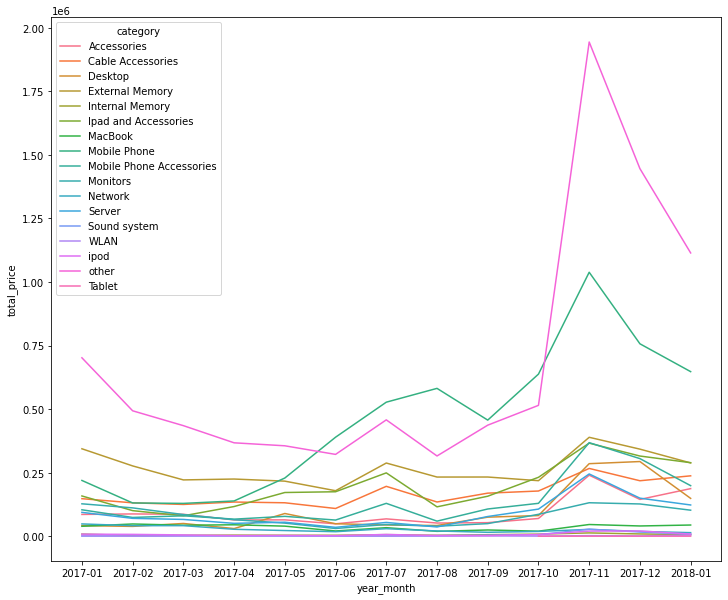

In [ ]:
#laura #plotting categories and revenue
orders2['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines['date'])

orders_month_revenue=(orderlines2
              .filter(["id_order","sku","unit_price", 'total_price'])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
              .groupby(['year_month', 'category'])
              .agg({'id_order':'count','total_price':'sum'})
              .dropna()
              .reset_index())
plt.subplots(figsize=(12, 10))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_revenue, hue='category')


##Categories unit price and revenue 

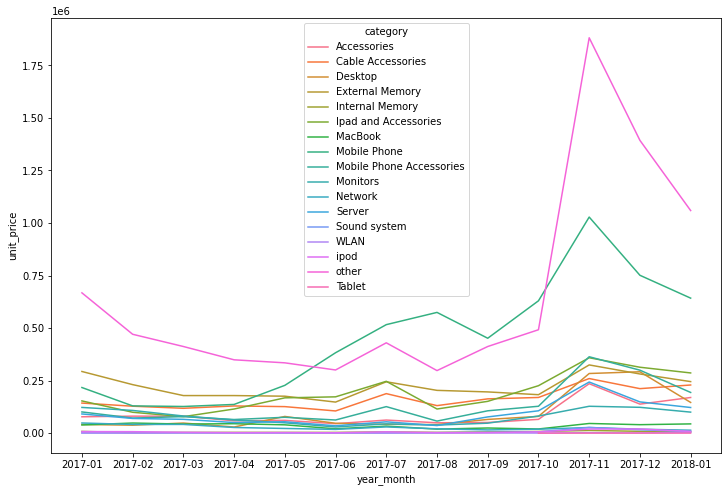

In [ ]:
#laura #code for unit price and categories (we are not using this one on the presentation)
import matplotlib.pyplot as plt
import seaborn as sns


orders_month_unit_price=(orderlines2
              .filter(["id_order","sku","unit_price"])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
              .groupby(['year_month', 'category'])
              .agg({'id_order':'count','unit_price':'sum'})
              .dropna()
              .reset_index())
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'unit_price', data=orders_month_unit_price, hue='category')


## Which are top 5 categories

In [ ]:
orders_month1=(orderlines2
              .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month_day=orderlines.date.dt.strftime('%Y-%m-%d'))
              .groupby(['category'])
              .agg({'id_order':'count','total_price':'sum', 'product_quantity':'count'})
              .sort_values('total_price', ascending=False)
              .dropna()
              .reset_index())
orders_month1.head(20)

,category,id_order,total_price,product_quantity
0,other,87636,10416132.47,87636
1,Mobile Phone,28722,6928849.71,28722
2,External Memory,33922,4018588.98,33922
3,Ipad and Accessories,15071,2948396.86,15071
4,Cable Accessories,17217,2539039.92,17217
5,Mobile Phone Accessories,28073,2069029.44,28073
6,Desktop,10451,1494147.72,10451
7,Accessories,15142,1461632.64,15142
8,Server,4137,1372371.93,4137
9,Monitors,4291,1204341.03,4291


##Plotting top 5 categories product quantity and revenue

In [ ]:
#laura #code and plot of top 5 categories 
orders_month_top5 = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accessories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'sum', 'product_quantity':'count'})
                      .dropna()
                      .reset_index())

orders_month_top5.head(10)


,year_month,category,total_price,product_quantity
0,2017-01,Cable Accessories,164952.86,1761
1,2017-01,External Memory,376849.28,4062
2,2017-01,Ipad and Accessories,170591.96,1196
3,2017-01,Mobile Phone,238988.75,1937
4,2017-01,other,764021.51,7198
5,2017-02,Cable Accessories,145266.40,1117
6,2017-02,External Memory,307159.97,2934
7,2017-02,Ipad and Accessories,110288.39,598
8,2017-02,Mobile Phone,143448.16,1109
9,2017-02,other,544125.45,4694


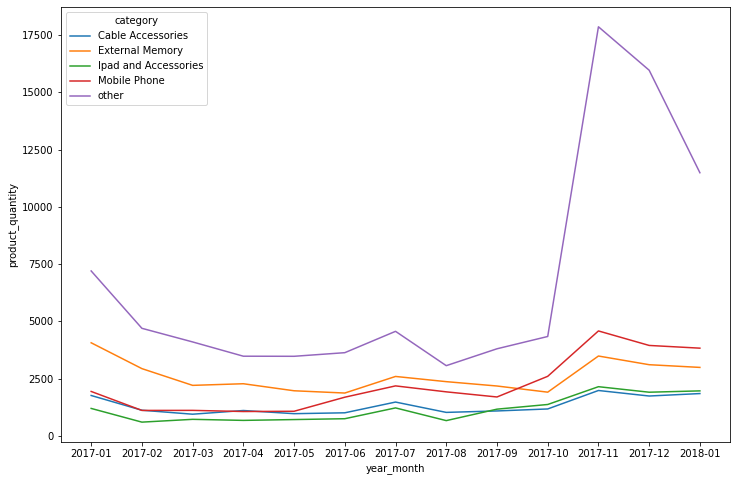

In [ ]:
#laura #this plot the quantity of products on each category 
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'product_quantity', data=orders_month_top5, hue='category')

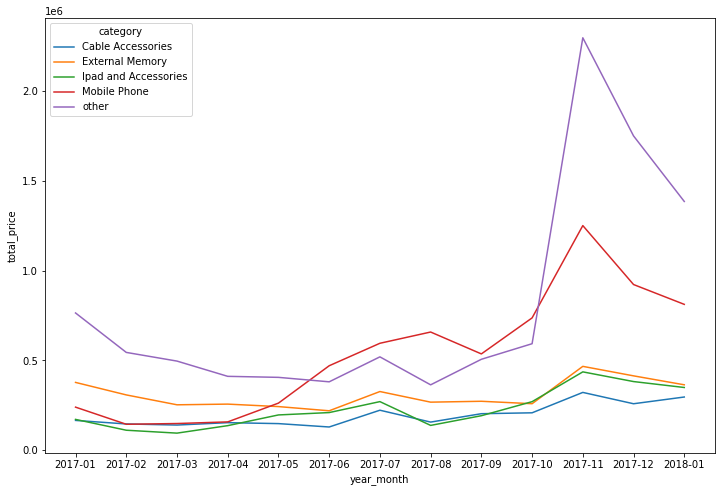

In [ ]:
#laura #this plots revenue across top 5 categories
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_top5, hue='category')

In [ ]:
#Rene #code and plot of top 5 categories based on mean
orders_month_top5_mean = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines2.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accesories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'mean', 'product_quantity':'count'})
                      .dropna()
                      .reset_index()
)


### Plot of categories and mean revenue

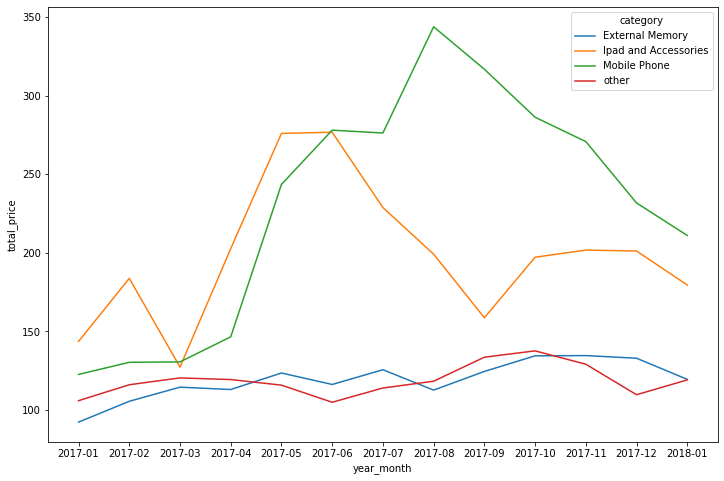

In [ ]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_top5_mean, hue='category')

### Categories sold per year

In [ ]:
#laura plot of number of products on each category sold each year (please consider that year 2018 goes only until march ) 
orders_sold_categories_y = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year = orderlines.date.dt.strftime('%Y'))
                      .groupby(['year', 'category'])
                      .agg({'product_quantity':'sum'})
                      .dropna()
                      .reset_index()
                      )

orders_sold_categories_y.head(10)

,year,category,product_quantity
0,2017,Accesories,21093
1,2017,Cable Accesories,6731
2,2017,Desktop,9400
3,2017,External Memory,40395
4,2017,Ipad,13736
5,2017,MacBook,786
6,2017,Mobile Phone,25859
7,2017,Mobile Phone Accesories,25803
8,2017,Monitors,4345
9,2017,Server,4206


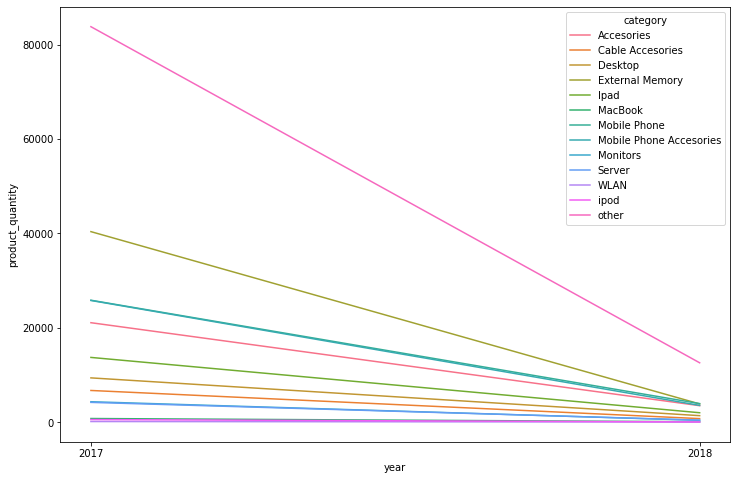

In [ ]:
#laura plot of number of products sold each year (please consider that year 2018 goes only until march )
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year', y = 'product_quantity', data=orders_sold_categories_y, hue='category')

### Categories sold per month

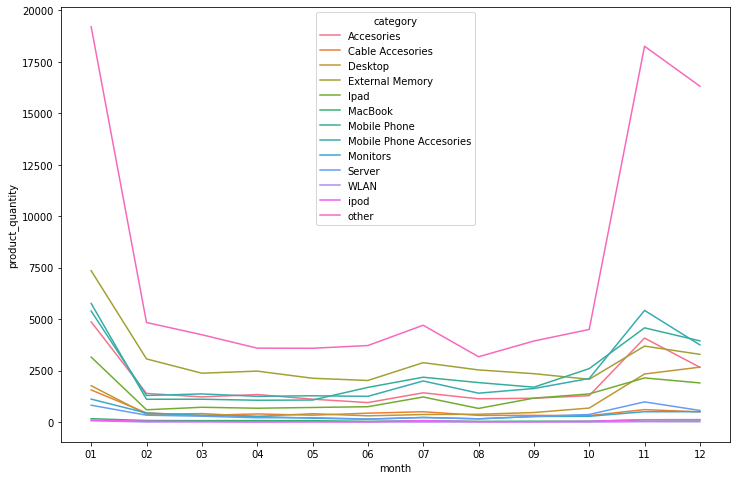

In [ ]:
#laura #number of products categories sold each month
orders_sold_categories_m = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(month = orderlines.date.dt.strftime('%m'))
                      .groupby(['month', 'category'])
                      .agg({'product_quantity':'count'})
                      .dropna()
                      .reset_index())

orders_sold_categories_m.head(10)
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'month', y = 'product_quantity', data=orders_sold_categories_m, hue='category')

### Categories and groupsize

In [ ]:
# Rene #top5 groupsize
orders_top5_groupsize = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accesories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'sum', 'id_order':'count'})
                      .dropna()
                      .reset_index()
                      .assign(revenue_groupsize = lambda x: x["total_price"] / x["id_order"])
                      )

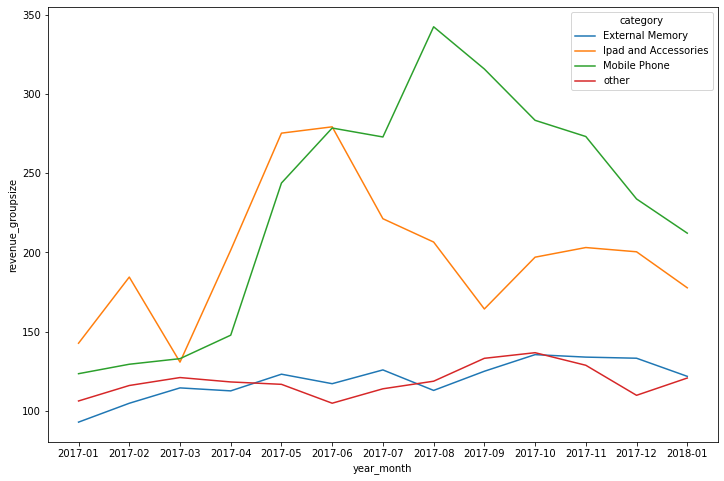

In [ ]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'revenue_groupsize', data=orders_top5_groupsize, hue='category')

#Create discounts columns on orderlines:



In [ ]:
#discounts = (
#orderlines
 #   .filter(["id_order","sku","unit_price", "date"])
  #  .merge(products.filter(["sku","desc","max_price_orderlines", "price"]), on="sku", how="left")
   # .assign(disc_1 = lambda x: x["price"] - x["unit_price"])
    #.assign(disc_2 = lambda x: x["max_price_orderlines"] - x["unit_price"])
    #.assign(disc_1_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 ) 
    #.assign(disc_2_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )  
    #.copy()
#)
#discounts

In [ ]:
#do not delete
discount_rami = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'sum'})
) 
discount_rami.tail(10)

total_price
year_month unit_price disc   disc_perc             
2018-01    327.58     39.00  10.64           327.58
           336.58     30.00  8.18            336.58
           347.58     37.00  9.62           1390.32
           353.59     30.99  8.06            707.18
           359.99     0.00   0.00           1079.97
           418.59     9.99   2.33            418.59
           701.65     147.35 17.36           701.65
           734.00     146.33 16.62          5138.00
           822.99     0.00   0.00            822.99
           829.00     51.33  5.83           5803.00

# Exploring Revenue over time

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#orders.query('state == "Completed"')
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

discount_rami.assign(no_discount = lambda x: True if x['disc'] == 0)

#orders_month=(orders
 #             .assign(year_month=orders.created_date.dt.strftime('%Y-%m'))
  #            .query('state=="Completed"')
   #           .groupby('year_month')
    #          .agg({'order_id':'count','total_paid':'sum'})
     #         .reset_index())
#orders_month.head(10)
plt.subplots(figsize=(15,5))
#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=discount_rami, x='year_month',y='order_id',palette='colorblind')
p.axhline(
    orders_month['order_id'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Order Numbers') 
plt.title('How sales evolution through 2017 and 2018') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

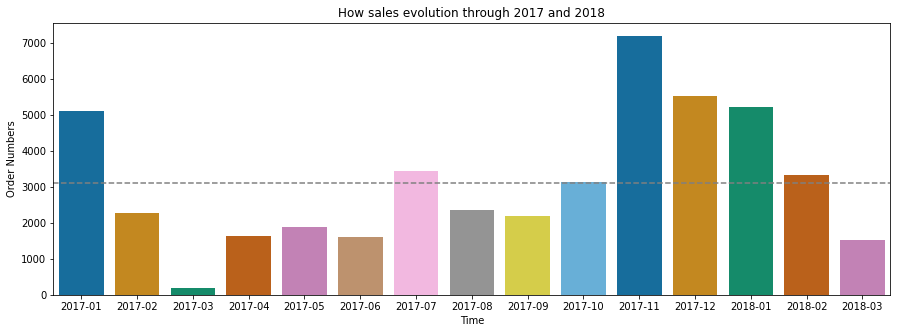

In [ ]:
#qeustion No 2--#Exploring how sales/revenue evolve through time

import matplotlib.pyplot as plt
import seaborn as sns
#orders.query('state == "Completed"')
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

orders_month=(orders
              .assign(year_month=orders.created_date.dt.strftime('%Y-%m'))
              .query('state=="Completed"')
              .groupby('year_month')
              .agg({'order_id':'count','total_paid':'sum'})
              .reset_index())
#orders_month.head(10)
plt.subplots(figsize=(15,5))
#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.barplot(data=orders_month,x='year_month',y='order_id',palette='colorblind')
p.axhline(
    orders_month['order_id'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Order Numbers') 
plt.title('How sales evolution through 2017 and 2018') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

## Revenue over time plot used in presentation

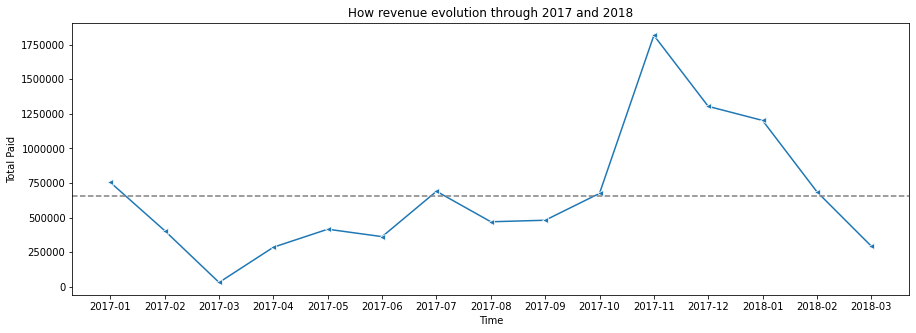

In [ ]:
orders_month=(orders2
              .assign(year_month=orders.created_date.dt.strftime('%Y-%m'))
              .query('state=="Completed"')
              .groupby('year_month')
              .agg({'total_paid':'sum'})
              .reset_index())

plt.subplots(figsize=(15,5))

#p=sns.barplot(data=orders_month,x='year_month',y='total_paid',palette='colorblind')
p=sns.lineplot(data=orders_month,x='year_month',y='total_paid',marker='<')


p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Total Paid') 
plt.title('How revenue evolution through 2017 and 2018') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


## Revenue evolution in days

In [ ]:
orders_new1 = orders2.assign(year = orders2['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'),
           day = orders['created_date'].dt.strftime('%A'))
orders_new1

,order_id,created_date,total_paid,state,check_orders,year,month,day
0,241319,2017-01-02 13:35:40,44.99,Cancelled,True,2017,Jan,Monday
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov,Monday
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec,Sunday
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb,Thursday
4,243784,2017-11-24 13:35:19,157.86,Cancelled,True,2017,Nov,Friday
...,...,...,...,...,...,...,...,...
204686,527397,2018-03-14 13:56:38,42.99,Place Order,True,2018,Mar,Wednesday
204687,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True,2018,Mar,Wednesday
204688,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True,2018,Mar,Wednesday
204689,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True,2018,Mar,Wednesday


In [ ]:
orders_new = (orders2.assign(year = orders2['created_date'].dt.strftime('%Y'), 
           month = orders2['created_date'].dt.strftime('%b'),
           day = orders2['created_date'].dt.strftime('%A'))
           .groupby(['year','month', 'day'])
    .agg({'total_paid':'sum'})
    
    .reset_index()
)
orders_new

,year,month,day,total_paid
0,2017,Apr,Friday,257093.56
1,2017,Apr,Monday,335554.56
2,2017,Apr,Saturday,221144.19
3,2017,Apr,Sunday,241414.92
4,2017,Apr,Thursday,237940.15
5,2017,Apr,Tuesday,369888.66
6,2017,Apr,Wednesday,279326.14
7,2017,Aug,Friday,237492.98
8,2017,Aug,Monday,316619.35
9,2017,Aug,Saturday,176650.37


### Query only completed orders

In [ ]:
orders_compl = orders2.query('state == "Completed"')
orders_compl

,order_id,created_date,total_paid,state,check_orders
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
5,245275,2017-06-28 11:35:37,149.00,Completed,True
6,245595,2017-01-21 12:52:47,112.97,Completed,True
...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True
204423,527070,2018-03-14 11:50:48,24.97,Completed,True
204426,527074,2018-03-14 11:51:42,24.97,Completed,True
204444,527096,2018-03-14 11:58:40,34.96,Completed,True


In [ ]:
orders_new = orders_compl.assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders_compl['created_date'].dt.strftime('%b'),
           day = orders_compl['created_date'].dt.strftime('%A'))
orders_new

,order_id,created_date,total_paid,state,check_orders,year,month,day
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov,Monday
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec,Sunday
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb,Thursday
5,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,Jun,Wednesday
6,245595,2017-01-21 12:52:47,112.97,Completed,True,2017,Jan,Saturday
...,...,...,...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,Mar,Wednesday
204423,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,Mar,Wednesday
204426,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,Mar,Wednesday
204444,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,Mar,Wednesday


### Only months with most revenue (before taking out outliers)

In [ ]:

orders_new = (orders.assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'),
           day = orders['created_date'].dt.strftime('%A'))
.query('month==["Jan","Nov","Dec","Jul"]')
           .groupby(['year','month', 'day'])
    .agg({'total_paid':'sum'})
    
    .reset_index()
)
orders_new.head()

,year,month,day,total_paid
0,2017,Dec,Friday,2215665.95
1,2017,Dec,Monday,2272915.48
2,2017,Dec,Saturday,2674716.76
3,2017,Dec,Sunday,2473026.08
4,2017,Dec,Thursday,2755419.05


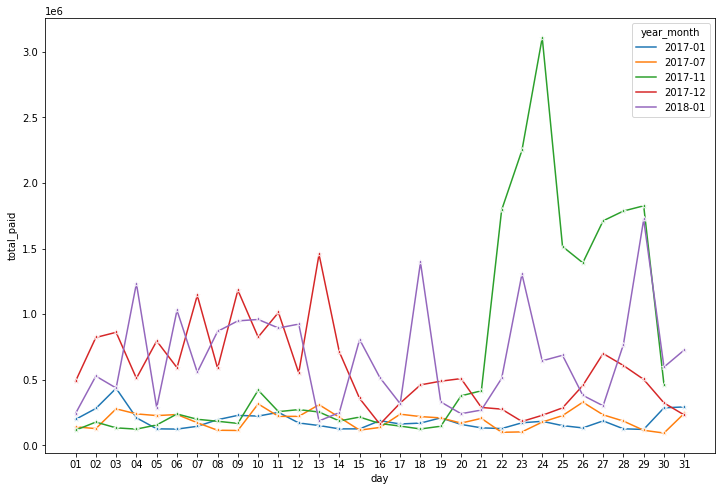

In [ ]:
orders_new = (orders.assign(
           year_month = orders['created_date'].dt.strftime('%Y-%m'),
           day = orders['created_date'].dt.strftime('%d'))
.query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
           .groupby(['year_month','day'])
    .agg({'total_paid':'sum'})
    
    .reset_index()
)

orders_new.head(10)
plt.subplots(figsize=(12, 8))

p=sns.lineplot(
    data= orders_new,
    x='day', 
    y='total_paid', 
    hue='year_month',marker='*')  
#orders_new.loc[orders_new.year_month=='2017-11']

24-11-2017---(total paid 3106027.82) Black Fri. Sale (the sales baginn 2 days from Black Fri.)

27-11-2017-   Cyber day sale(continue 2 days)

12.2017 Chrismas Sales( gift buying for Chrismas)

01.2017/01.2018 January Sale, sales held after Chris. to encourage customers back to the shops



In [ ]:
orders_new_2= (orders_compl.assign(year =   orders['created_date'].dt.strftime('%Y'), 
           month =   orders['created_date'].dt.strftime('%b'),
           day =   orders['created_date'].dt.strftime('%A'))
           .query('month==["Nov","Dec", "Jan", "Jul"]')
           .groupby(['year','month','day'])
            .agg({'total_paid':'sum'})
            .reset_index()
)

### Plot of days of the week and top revenue months (before outliers)

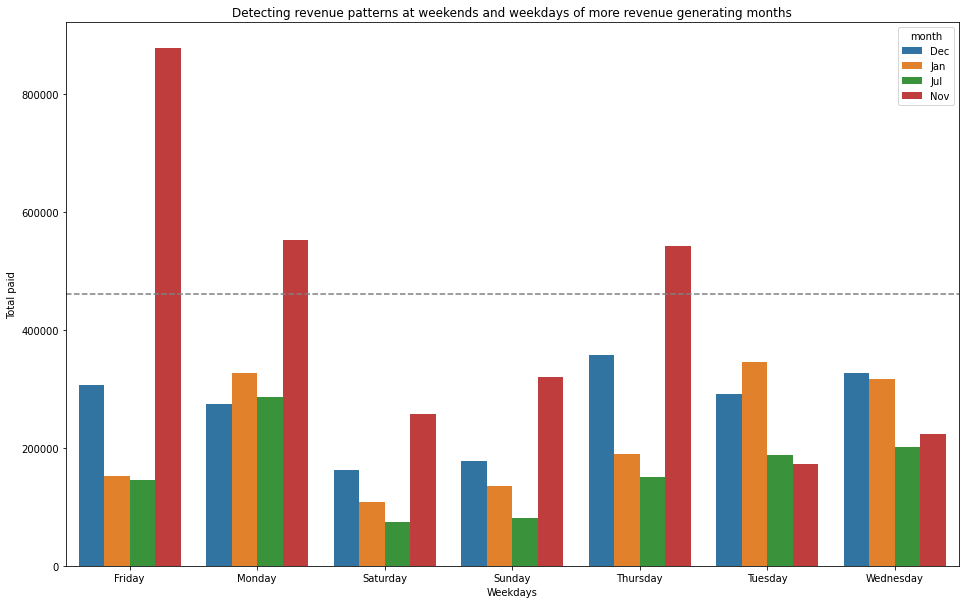

In [ ]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(16, 10))

p = sns.barplot(
    data=orders_new_2, # dataframe we will use to look for the columns information
    x='day', # x values on our chart
    y='total_paid', # y values on our chart
    hue='month',
    ci = None # group color in our chart
    #order=months # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    orders_new['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Weekdays') # x label name
plt.ylabel('Total paid') 
plt.title('Detecting revenue patterns at weekends and weekdays of more revenue generating months') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

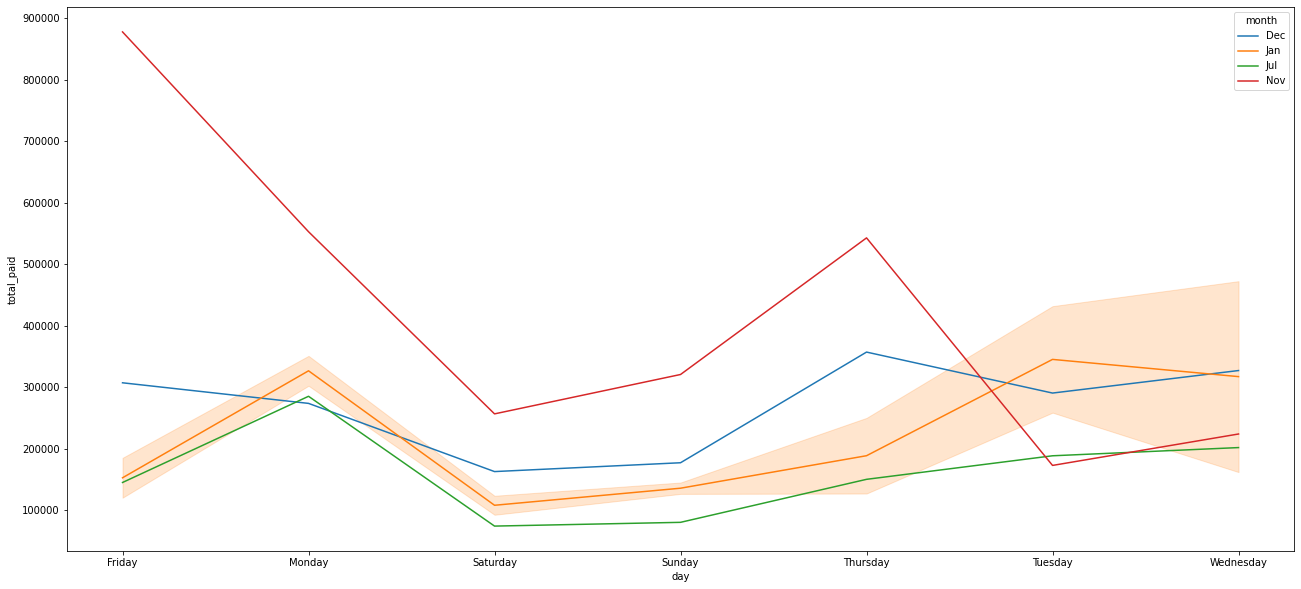

In [ ]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'day', y = 'total_paid', data=orders_new_2, hue='month')

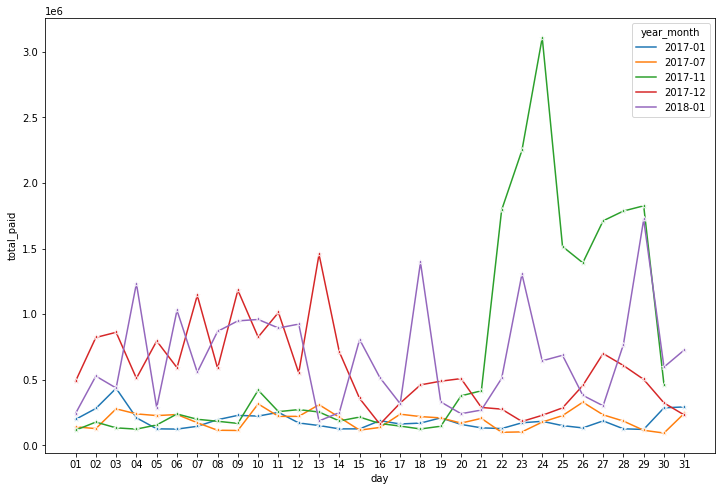

In [ ]:
orders_new_2= (orders_compl.assign(
           year_month = orders['created_date'].dt.strftime('%Y-%m'),
           day = orders['created_date'].dt.strftime('%d'))
.query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
           .groupby(['year_month','day'])
    .agg({'total_paid':'sum'})
    
    .reset_index()
)

orders_new.head(10)
plt.subplots(figsize=(12, 8))

p=sns.lineplot(
    data= orders_new,
    x='day', 
    y='total_paid', 
    hue='year_month',marker='*')  
#orders_new.loc[orders_new.year_month=='2017-11']

## Revenue evolution in hours

In [ ]:
orders_new_4 = orders_compl.assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders_compl['created_date'].dt.strftime('%b'),
           day = orders_compl['created_date'].dt.strftime('%A'))


In [ ]:
orders_new_4['hour'] = orders_new_4['created_date'].dt.hour



In [ ]:
orders_new_4 = orders_new_4.assign(year_month = orders['created_date'].dt.strftime('%Y-%m'),
           day = orders['created_date'].dt.strftime('%d'))


In [ ]:
orders_new_4 = (orders_new_4.query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
           .groupby(['year_month','hour'])
    .agg({'total_paid':'sum'})
    .reset_index()
)
orders_new_4

,year_month,hour,total_paid
0,2017-01,0,30892.47
1,2017-01,1,12189.19
2,2017-01,2,5204.87
3,2017-01,3,5956.90
4,2017-01,4,1618.27
5,2017-01,5,1677.13
6,2017-01,6,2812.65
7,2017-01,7,5659.75
8,2017-01,8,15947.06
9,2017-01,9,31699.62


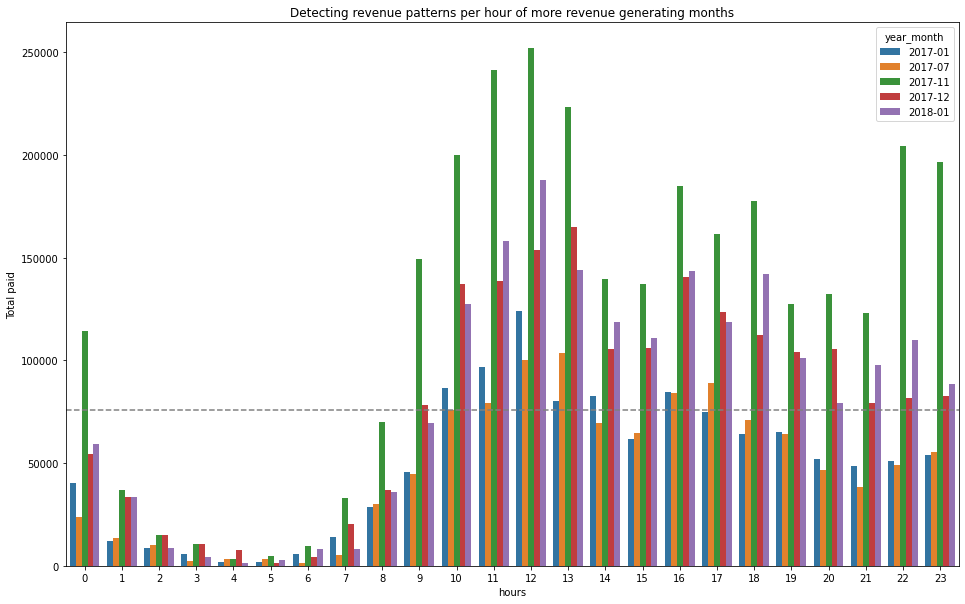

In [ ]:
#Detecting revenue pattern per hour of more  revenue generating months. Not to show in presentation
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(16, 10))

p = sns.barplot(
    data=orders_new_4, # dataframe we will use to look for the columns information
    x='hour', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year_month',
    ci = None # group color in our chart
    #order=months # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    orders_new_4['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('hours') # x label name
plt.ylabel('Total paid') 
plt.title('Detecting revenue patterns per hour of more revenue generating months') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

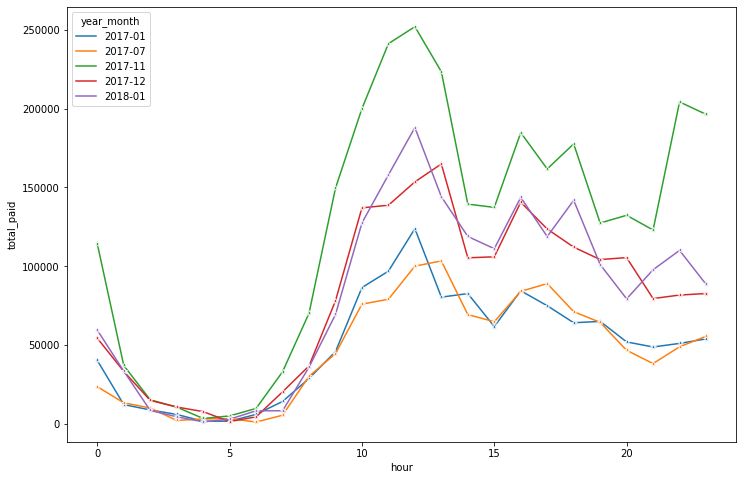

In [ ]:
# Detecting revenue pattern per hour of more revenue generating months
plt.subplots(figsize=(12, 8))

p=sns.lineplot(
    data= orders_new_4,
    x='hour', 
    y='total_paid', 
    hue='year_month',marker='*')  
#orders_new.loc[orders_new.year_month=='2017-11']

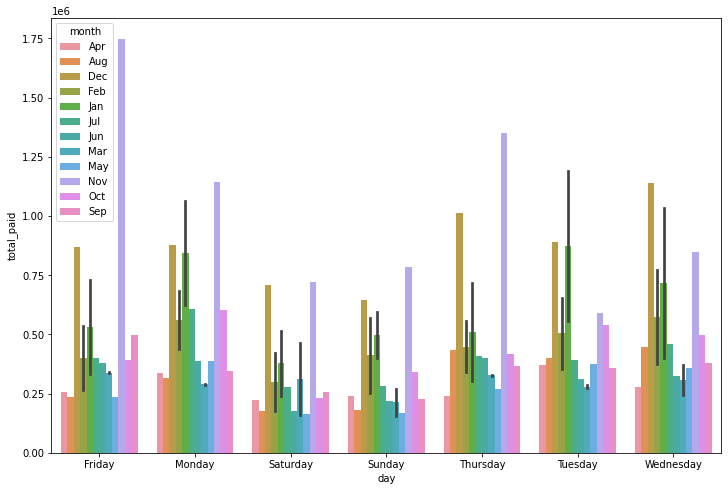

In [ ]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))
p = sns.barplot(
    data= orders_new, # dataframe we will use to look for the columns information
    x='day', # x values on our chart
    y='total_paid', # y values on our chart
    hue='month') # group color in our chart
     # order x columns
    
    

# Discount and Revenue

##Plot of revenue and discount percent

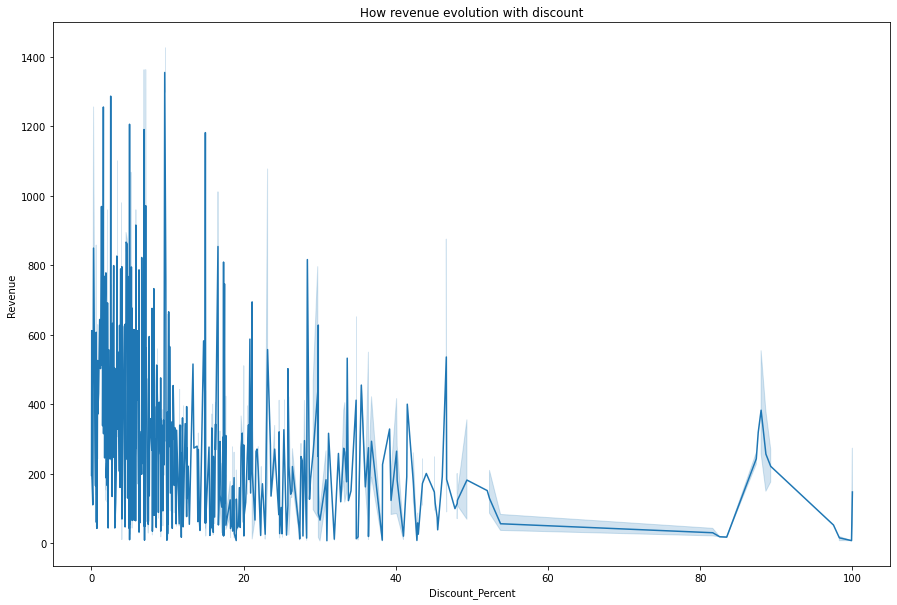

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
disc_df=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .dropna()
)
#disc_df.head()
plt.subplots(figsize=(15, 10))

p=sns.lineplot(x='disc_perc', y='total_paid',data=disc_df)
plt.xlabel('Discount_Percent') 
plt.ylabel('Revenue') 
plt.title('How revenue evolution with discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

###Plot discount status on revenue over time: 

In [ ]:
discount_rami_2 = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .dropna()
    .copy()
)


import matplotlib.pyplot as plt
import seaborn as sns

discount_rami_2['discount_status'] = discount_rami_2.apply(lambda row: 'True' if row['disc'] == 0 else False, axis = 1)
discount_rami_2.info()

discount_rami_plot = discount_rami_2.groupby(['year_month', 'discount_status']).agg({'total_price':'sum'})
discount_rami_plot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4707 entries, 34 to 249458
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_order              4707 non-null   int64         
 1   sku                   4707 non-null   object        
 2   unit_price            4707 non-null   float64       
 3   date                  4707 non-null   datetime64[ns]
 4   total_price           4707 non-null   float64       
 5   desc                  4707 non-null   object        
 6   max_price_orderlines  4707 non-null   float64       
 7   disc                  4707 non-null   float64       
 8   disc_perc             4707 non-null   float64       
 9   year_month            4707 non-null   object        
 10  discount_status       4707 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 441.3+ KB


total_price
year_month discount_status             
2017-01    False               67752.85
           True                22116.43
2017-02    False               50302.40
           True                16779.49
2017-03    False               28015.38
           True                14338.52
2017-04    False               15936.73
           True                 6735.25
2017-05    False               24777.95
           True                 5776.47
2017-06    False               14230.02
           True                 5096.81
2017-07    False               18217.63
           True                 9122.54
2017-08    False               16876.83
           True                 7153.40
2017-09    False               15243.44
           True                13938.01
2017-10    False               31534.42
           True                 8865.18
2017-11    False               51055.35
           True                16931.37
2017-12    False               38986.11
           True                15850.16
2018-01    False               39650.46
           True                17089.47

In [ ]:
discount_rami_2.groupby('discount_status')['sku'].count()

discount_status
False    3089
True     1618
Name: sku, dtype: int64

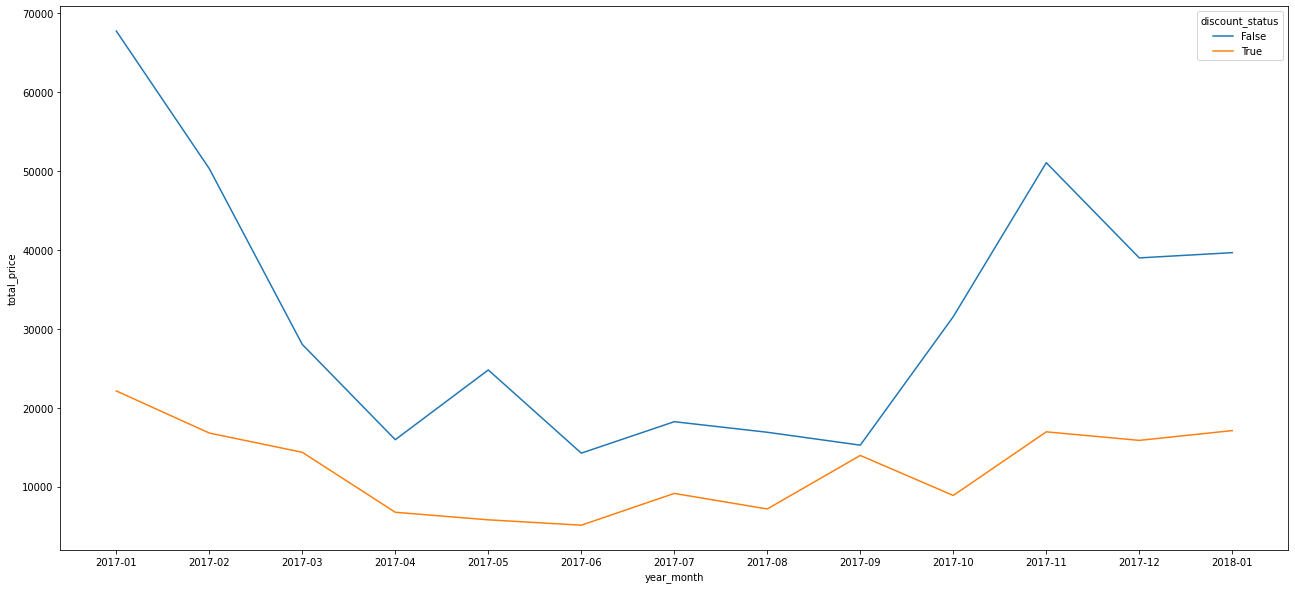

In [ ]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'year_month', y = 'total_price', data=discount_rami_plot, hue='discount_status')

### Gouying plot on discount and revenue

----**From Guoying Dai**

I put my result of the revenue and discount relationship.

the first one the revenue come from the orders dataset, the column of --total paid.
in the the second one, the revenue is caculated by 'unit_price'*"product_quantity'

then I got the difference plot. I do not know why. Maybe we could discuss it on Monday.

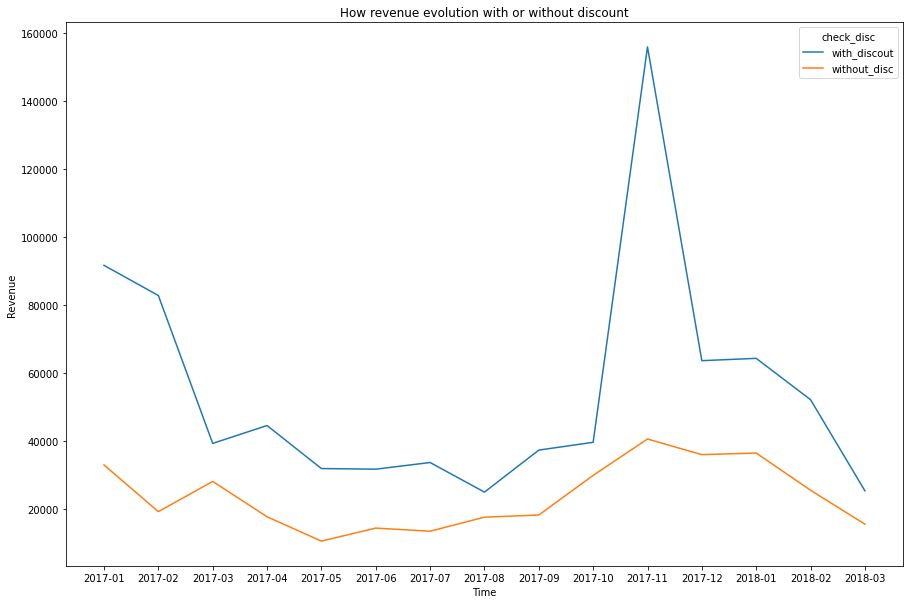

In [ ]:
disc_analyse=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .dropna()
    ) 

disc_analyse["check_disc"]=disc_analyse.apply(lambda x: 'without_disc' if x['disc'] == 0.00 else 'with_discout',axis=1)
disc_analyse=(disc_analyse
              .groupby(['year_month','check_disc'])
              .agg({'total_paid':'sum'})
              .reset_index())

plt.subplots(figsize=(15,10))
p=sns.lineplot(x='year_month',y='total_paid',data=disc_analyse,hue='check_disc')

plt.xlabel('Time') 
plt.ylabel('Revenue') 
plt.title('How revenue evolution with or without discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


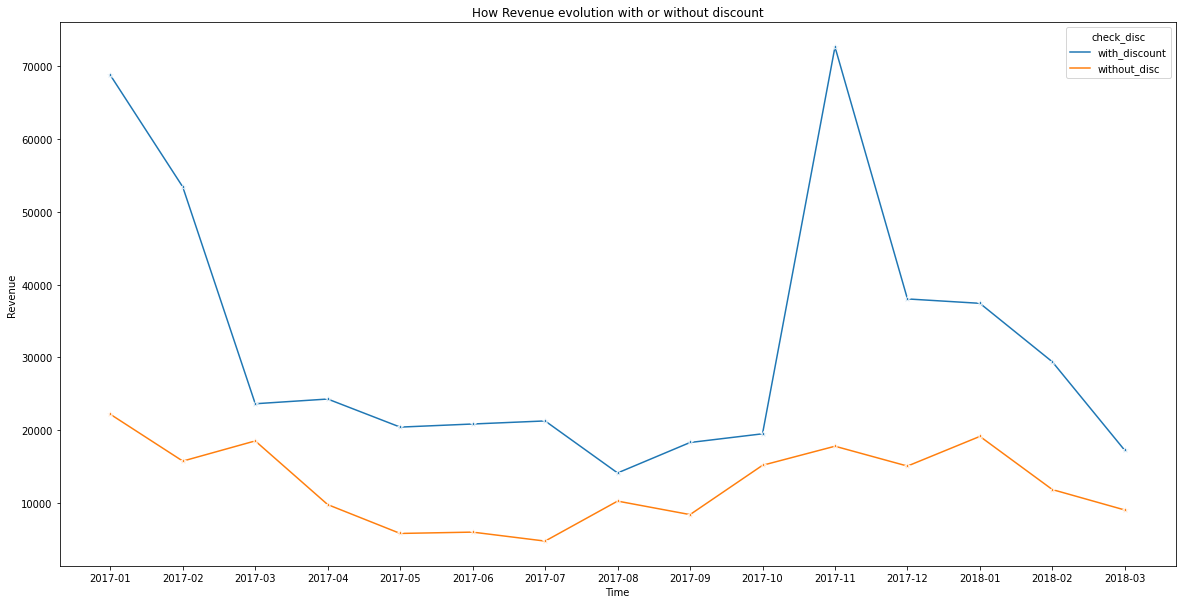

In [ ]:
disc_analyse=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(revenue= lambda x: x['unit_price']* x['product_quantity'])
    .dropna()
    ) 

disc_analyse["check_disc"]=disc_analyse.apply(lambda x: 'without_disc' if x['disc'] == 0.00 else 'with_discount',axis=1)
disc_analyse=(disc_analyse.groupby(['year_month','check_disc'])
    .agg({'revenue':'sum'})
    .reset_index())

plt.subplots(figsize=(20,10))

p=sns.lineplot(x='year_month',y='revenue',data=disc_analyse,hue='check_disc',marker='*')

plt.xlabel('Time') 
plt.ylabel('Revenue') 
plt.title('How Revenue evolution with or without discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

### Discount categories and revenue

In [ ]:
#Rene #do not delete
discount_rami_2 = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'sum'})
    .reset_index()
) 
discount_rami.tail(10)

total_price
year_month unit_price disc   disc_perc             
2018-01    327.58     39.00  10.64           327.58
           336.58     30.00  8.18            336.58
           347.58     37.00  9.62           1390.32
           353.59     30.99  8.06            707.18
           359.99     0.00   0.00           1079.97
           418.59     9.99   2.33            418.59
           701.65     147.35 17.36           701.65
           734.00     146.33 16.62          5138.00
           822.99     0.00   0.00            822.99
           829.00     51.33  5.83           5803.00

In [ ]:
#rene 
def filter(x):
    if x == 0: 
      return "no discount"
    if (x > 0 and x <= 20):
        return '<=20%'
    if (x > 20 and x <= 40):
        return '21% - 40%'
    if (x > 40 and x <= 60):
        return '41% - 60%'
    if (x > 60 and x <= 80):
      return '61% - 80%'
    if(x > 80 and x <= 100):
      return '81% - 100%'
discount_rami_2['discount_category'] = discount_rami_2['disc_perc'].apply(filter).sort_values()
discount_rami_2

import numpy as np

discount_rami_2

,year_month,unit_price,disc,disc_perc,total_price,discount_category
0,2017-01,4.99,0.00,0.00,14.97,no discount
1,2017-01,5.49,0.00,0.00,170.19,no discount
2,2017-01,6.36,0.00,0.00,25.44,no discount
3,2017-01,6.49,3.50,35.04,19.47,21% - 40%
4,2017-01,6.49,4.51,41.00,6.49,41% - 60%
...,...,...,...,...,...,...
1146,2018-01,418.59,9.99,2.33,418.59,<=20%
1147,2018-01,701.65,147.35,17.36,701.65,<=20%
1148,2018-01,734.00,146.33,16.62,5138.00,<=20%
1149,2018-01,822.99,0.00,0.00,822.99,no discount


(0.0, 1500.0)

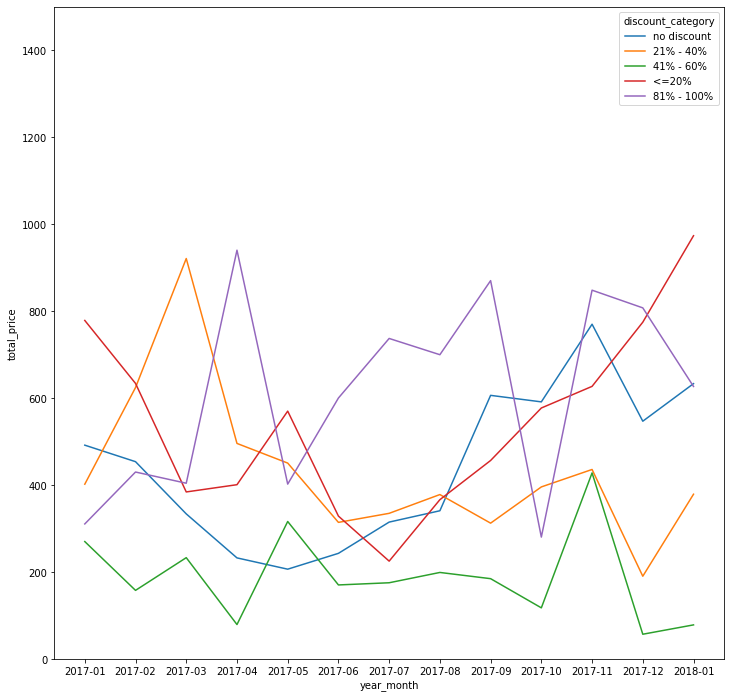

In [ ]:
#rene #plot discount revenue
plt.subplots(figsize=(12, 12))
sns.lineplot(x= 'year_month', y = 'total_price', hue='discount_category', data=discount_rami_2, ci=None)
plt.ylim(0, 1500)

### What discount did the top 5 product category have?

In [ ]:

disc_quantity=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines", "category"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accessories"]')
    .groupby(['category', 'year_month', 'disc_perc'])
    .agg({'product_quantity':'count','total_paid':'sum'})
    .reset_index()
    .dropna()
    ) 
disc_quantity.head(10)

,category,year_month,disc_perc,product_quantity,total_paid
0,Cable Accessories,2017-01,0.00,3,31.99
1,Cable Accessories,2017-01,4.04,1,86.68
2,Cable Accessories,2017-01,25.01,11,436.84
3,Cable Accessories,2017-02,0.00,3,152.45
4,Cable Accessories,2017-02,4.04,2,180.35
5,Cable Accessories,2017-03,0.00,3,220.49
6,Cable Accessories,2017-04,0.00,2,391.96
7,Cable Accessories,2017-04,6.25,1,34.98
8,Cable Accessories,2017-05,0.00,2,180.66
9,Cable Accessories,2017-05,6.25,1,29.99


(0.0, 50.0)

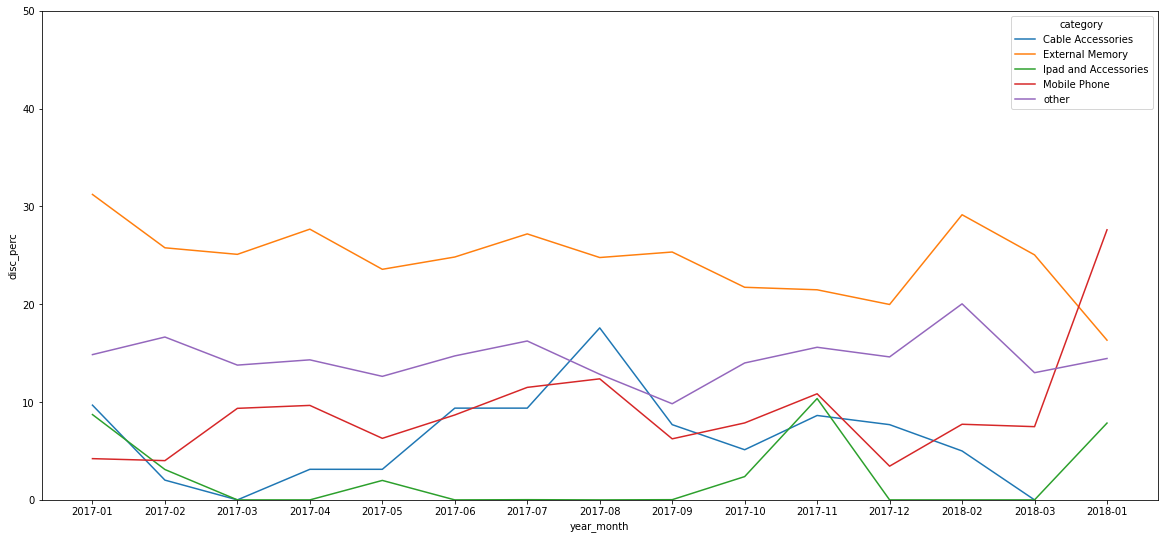

In [ ]:
plt.subplots(figsize=(20, 9))
sns.lineplot(x= 'year_month', y = 'disc_perc', data=disc_quantity, hue='category', ci=None)
plt.ylim(0, 50)

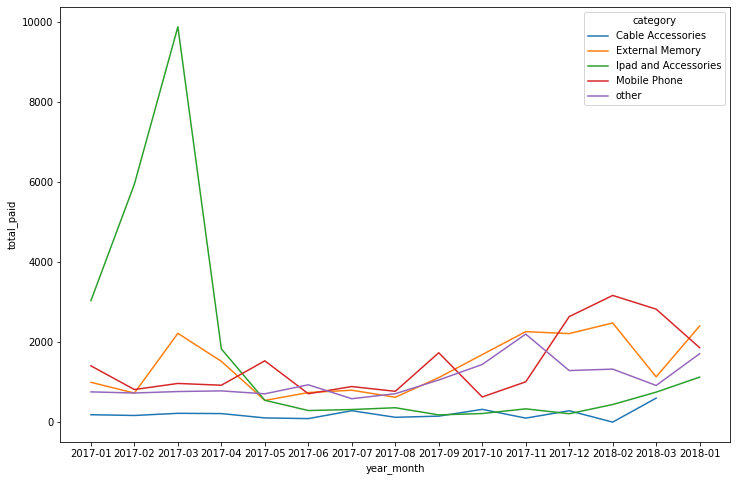

In [ ]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_paid', data=disc_quantity, hue='category', ci=None)


###All categories and the discount they had

In [ ]:

disc_quantity_allcat=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines", "category"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .groupby(['category', 'year_month', 'disc_perc'])
    .agg({'product_quantity':'count','total_paid':'sum'})
    .reset_index()
    .dropna()
    ) 
disc_quantity_allcat.head(10)

,category,year_month,disc_perc,product_quantity,total_paid
0,Accessories,2017-01,0.00,4,141.92
1,Accessories,2017-02,0.00,2,57.97
2,Accessories,2017-03,0.00,1,31.98
3,Accessories,2017-04,0.00,1,26.99
4,Accessories,2017-05,0.00,2,53.98
5,Accessories,2017-06,18.53,1,50.97
6,Accessories,2017-06,25.94,2,445.95
7,Accessories,2017-07,18.53,1,279.76
8,Accessories,2017-07,22.23,2,45.97
9,Accessories,2017-08,27.79,3,62.46


(0.0, 110.0)

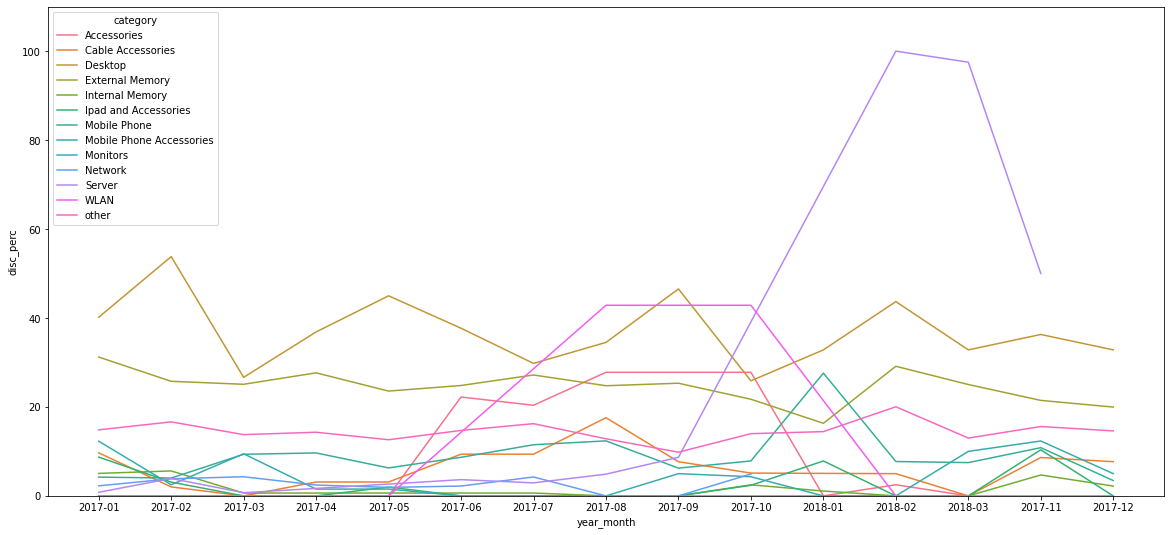

In [ ]:
plt.subplots(figsize=(20, 9))
sns.lineplot(x= 'year_month', y = 'disc_perc', data=disc_quantity_allcat, hue='category', ci=None)
plt.ylim(0, 110)

## Discount Categories and Revenue

In [ ]:
def filter(x):
    if x == 0: 
      return "no discount"
    if (x > 0 and x <= 20):
        return '<=20%'
    if (x > 20 and x <= 40):
        return '21% - 40%'
    if (x > 40 and x <= 60):
        return '41% - 60%'
    if (x > 60 and x <= 80):
      return '61% - 80%'
    if(x > 80 and x <= 100):
      return '81% - 100%'

In [ ]:
discount_rami_4 = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .reset_index()
) 

NameError: ignored

In [ ]:
discount_rami_4['discount_category'] = discount_rami_4['disc_perc'].apply(filter).sort_values()

In [ ]:
plt.subplots(figsize=(22, 10))
sns.boxplot(x= 'discount_category', y = 'total_price', data=discount_rami_4)

In [ ]:
discount_rami_3 = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'mean'})
    .reset_index()
) 

In [ ]:
discount_rami_3['discount_category'] = discount_rami_3['disc_perc'].apply(filter).sort_values() 

In [ ]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'year_month', y = 'average_price', hue='discount_category', ci=None, data=discount_rami_3)
plt.ylim(0, 400)

# Evolution of Sales in quarters

### Using order csv seasons

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

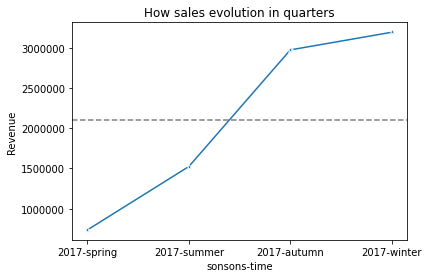

In [ ]:
#How sales evolution in seasons with outliers on orders
from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns
orders2['created_date'] = pd.to_datetime(orders2['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orders2['created_date']=orders2['created_date'].dt.strftime('%Y-%m')

orders2['seasons']=orders2['created_date'].map({'2017-03':'2017-spring','2017-04':'2017-spring','2017-05':'2017-spring'
,'2017-06':'2017-summer','2017-07':'2017-summer','2017-08':'2017-summer',
'2017-09':'2017-autumn','2017-10':'2017-autumn','2017-11':'2017-autumn'
,'2017-12':'2017-winter','2018-01':'2017-winter','2018-02':'2017-winter'})
sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']

orders_month=(orders2
              .query('state=="Completed"')
              .groupby('seasons')
              .agg({'total_paid':'sum'})
              .reset_index())

sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']
orders_month.index=orders_month['seasons']
orders_month=orders_month.loc[sort_list]

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='seasons',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('sonsons-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


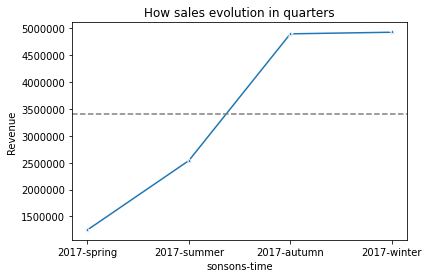

In [ ]:
#How sales evolution in seasons
from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

orders['created_date']=orders['created_date'].dt.strftime('%Y-%m')

orders['seasons']=orders['created_date'].map({'2017-03':'2017-spring','2017-04':'2017-spring','2017-05':'2017-spring'
,'2017-06':'2017-summer','2017-07':'2017-summer','2017-08':'2017-summer',
'2017-09':'2017-autumn','2017-10':'2017-autumn','2017-11':'2017-autumn'
,'2017-12':'2017-winter','2018-01':'2017-winter','2018-02':'2017-winter'})
sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']

orders_month=(orders
              .query('state=="Completed"')
              .groupby('seasons')
              .agg({'total_paid':'sum'})
              .reset_index())

sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']
orders_month.index=orders_month['seasons']
orders_month=orders_month.loc[sort_list]

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='seasons',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('sonsons-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


### Using order csv quarters

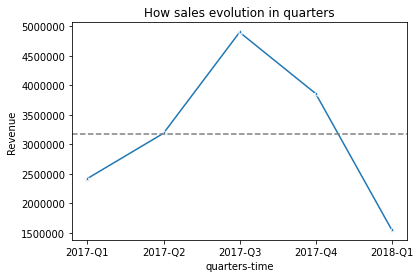

In [ ]:
#How sales evolution in quarters
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

orders['quarters']=pd.qcut(orders['created_date'],q=5, labels=('2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1'))

orders_month=(orders
              .query('state=="Completed"')
              .groupby('quarters')
              .agg({'total_paid':'sum'})
              .reset_index())

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='quarters',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('quarters-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

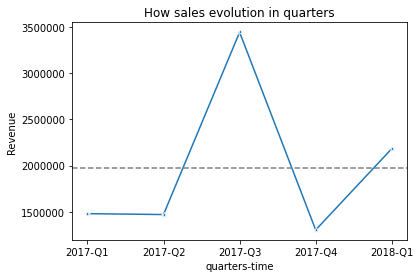

In [ ]:
#How sales evolution in quarters without outliers on orders
import matplotlib.pyplot as plt
import seaborn as sns
orders2['created_date'] = pd.to_datetime(orders2['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orders2['quarters']=pd.qcut(orders2['created_date'],q=5, labels=('2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1'))

orders_month=(orders2
              .query('state=="Completed"')
              .groupby('quarters')
              .agg({'total_paid':'sum'})
              .reset_index())

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='quarters',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('quarters-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

##Revenue and discount with and without analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


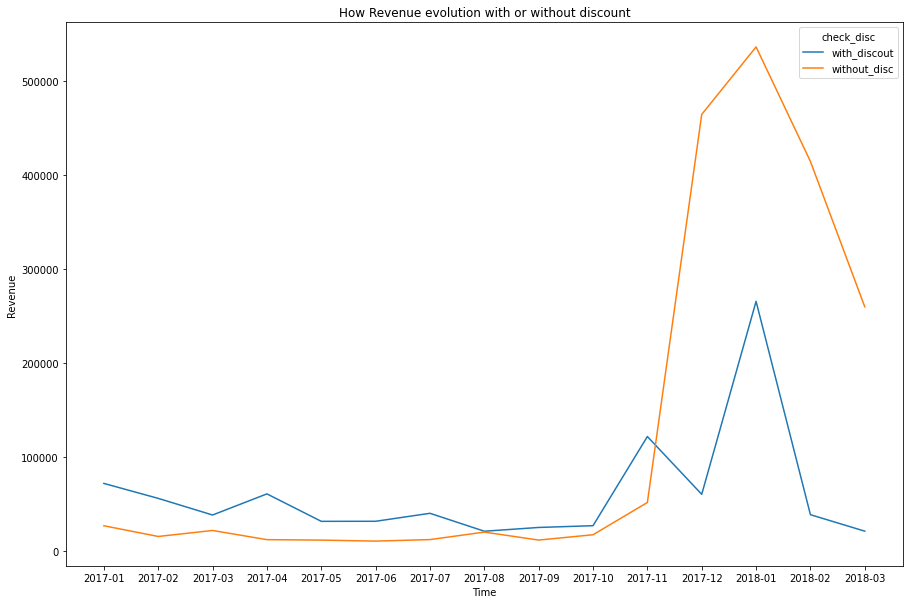

In [ ]:
from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

disc_df=(
orderlines
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .assign(revenue= lambda x: x['unit_price']* x['product_quantity'])
    .dropna())


Q1=disc_df.disc.quantile(0.25)#Q1 of disc
Q3=disc_df.disc.quantile(0.75) #Q1 of disc
IQR=Q3-Q1

Q1_r=disc_df.revenue.quantile(0.25)#Q1 of revenue
Q3_r=disc_df.revenue.quantile(0.75) #Q3 of revenue
IQR_r=Q3_r-Q1_r

filter=disc_df.loc[(disc_df['disc'] >= (Q1 - 1.5*IQR)) & (disc_df['disc'] <= (Q3 + 1.5*IQR))]
                                                          
filter=disc_df.loc[(disc_df['revenue'] >= (Q1_r - 1.5*IQR_r))&(disc_df['revenue'] <= (Q3_r + 1.5*IQR_r))]



filter["check_disc"]=filter.apply(lambda x: 'without_disc' if x['disc'] == 0.00 else 'with_discout',axis=1)

filter=(filter.groupby(['year_month','check_disc'])
    .agg({'revenue':'sum'})
    .reset_index())

plt.subplots(figsize=(15,10))

p=sns.lineplot(x='year_month', y='revenue',data=filter,hue='check_disc')

plt.xlabel('Time') 
plt.ylabel('Revenue') 
plt.title('How Revenue evolution with or without discount') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()
#print(Q1,Q3) 0,20
#print(Q1_r,Q3_r) 50.99 /879.0

## Revenue analysis without outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


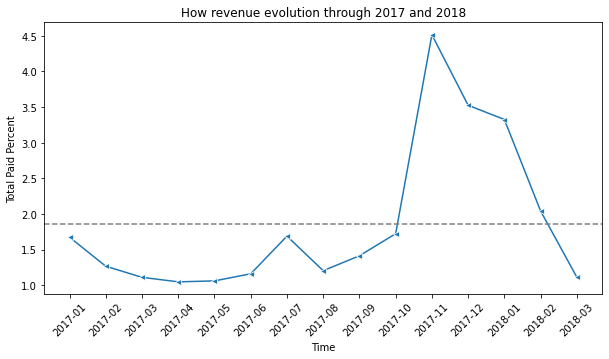

In [ ]:

from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns

orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2['date'] = pd.to_datetime(orderlines2['date'])
orderlines2_month=(orderlines2
              .assign(year_month=orderlines2['date'].dt.strftime('%Y-%m'))
              .assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
              .groupby('year_month')
              .agg({'total_paid':'sum'})
              .reset_index())
sum_totalpaid=sum(orderlines2_month.total_paid)

orderlines2_month['total_paid_perc']=orderlines2_month.apply(lambda x: (x['total_paid']/128659393.77)*100, axis=1)

plt.subplots(figsize=(10,5))

p=sns.lineplot(data=orderlines2_month,x='year_month',y='total_paid_perc',marker='<')

p.axhline(
    orderlines2_month['total_paid_perc'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Total Paid Percent') 
plt.title('How revenue evolution through 2017 and 2018') 
plt.xticks(rotation=45)
plt.show()



### Revenue date of the month with new months after outliers removed

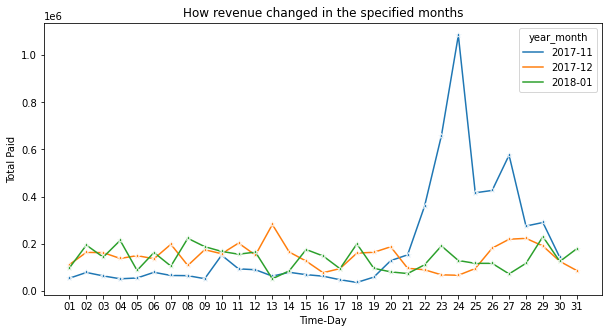

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2_new = (orderlines2
                  .assign(year_month = orderlines2['date'].dt.strftime('%Y-%m'), day = orderlines2['date'].dt.strftime('%d'))
                  .assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
                  .query('year_month==["2017-11","2017-12","2018-01"]')
                  .groupby(['year_month','day'])
                  .agg({'total_paid':'sum'})
                  .reset_index())

plt.subplots(figsize=(10, 5))

p=sns.lineplot(
    data= orderlines2_new,
    x='day', 
    y='total_paid', 
    hue='year_month',marker='*')  

plt.xlabel('Time-Day') 
plt.ylabel('Total Paid') 
plt.title('How revenue changed in the specified months') 
plt.show()

p.axhline(
    orderlines2_new['total_paid'].mean(),
    linestyle='--', 
    color='gray')


###Revenue and hour on the day to the top revenue months after outliers removed

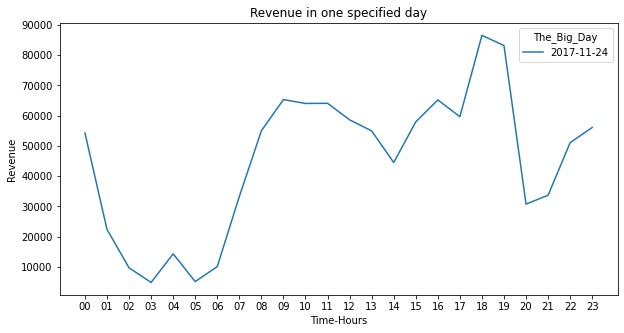

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2_new = (orderlines2.assign(
           hour = orderlines2['date'].dt.strftime('%H'),
           The_Big_Day= orderlines2['date'].dt.strftime('%Y-%m-%d'))
          .assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
           .query('The_Big_Day==["2017-11-24"]')
           .groupby(['hour','The_Big_Day'])
           .agg({'total_paid':'sum'})
           .reset_index())

plt.subplots(figsize=(10, 5))

p=sns.lineplot(
    data= orderlines2_new,
    x='hour', 
    y='total_paid', hue='The_Big_Day')

plt.xlabel('Time-Hours') 
plt.ylabel('Revenue') 
plt.title('Revenue in one specified day') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

## Evolution on quarters without outliers using orderlines csv

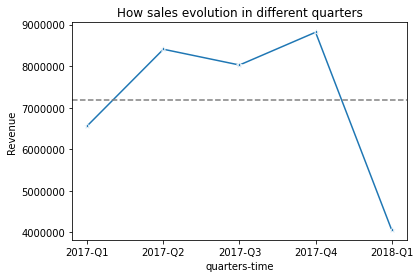

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2['quarters']=pd.qcut(orderlines2['date'],q=5, labels=('2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1'))

orderlines2_month=(orderlines2
              . assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
              .groupby('quarters')
              .agg({'total_paid':'sum'})
              .reset_index())

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orderlines2_month,x='quarters',y='total_paid',marker='*')
p.axhline(
    orderlines2_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('quarters-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in different quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

## Evolution on seasons without outliers using orderlines csv

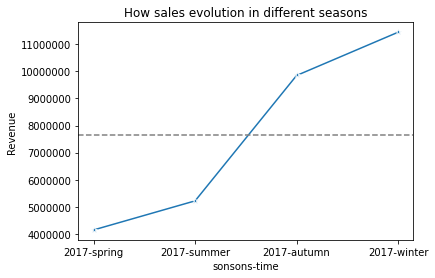

In [ ]:
from pandas._libs import index
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2['date']=orderlines2['date'].dt.strftime('%Y-%m')

orderlines2['seasons']=orderlines2['date'].map({'2017-03':'2017-spring','2017-04':'2017-spring','2017-05':'2017-spring'
,'2017-06':'2017-summer','2017-07':'2017-summer','2017-08':'2017-summer',
'2017-09':'2017-autumn','2017-10':'2017-autumn','2017-11':'2017-autumn'
,'2017-12':'2017-winter','2018-01':'2017-winter','2018-02':'2017-winter'})
sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']

orderlines2_month=(orderlines2
              . assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
              .groupby('seasons')
              .agg({'total_paid':'sum'})
              .reset_index())

sort_list=['2017-spring','2017-summer','2017-autumn','2017-winter']
orderlines2_month.index=orderlines2_month['seasons']
orderlines2_month=orderlines2_month.loc[sort_list]

#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orderlines2_month,x='seasons',y='total_paid',marker='*')
p.axhline(
    orderlines2_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('seasons-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in different seasons') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()
